In [2]:
from IPython.display import HTML

style = """
<style>
#header, div.unselected { display: none !important }
#notebook, .container { padding: 0 !important }
#site { height: 100% !important }
</style>
"""
style = ""

HTML(style)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Tạo tập dữ liệu để thí nghiệm 

In [2]:
# Tạo tập dữ liệu gồm 1000 mẫu (bằng hàm make_circles)
X, y = make_circles(n_samples=1000, noise=0.2, random_state=0, factor=0.5)

In [3]:
# Chia dữ liệu ra làm 2 tập là tập huấn luyện và tập kiểm tra theo tỉ lệ 80%:20%
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0, stratify=y)

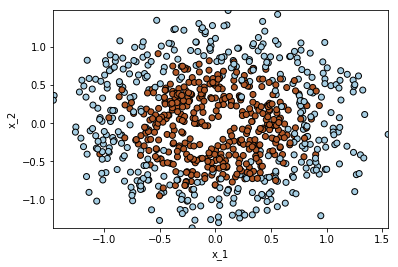

In [4]:
# Trực quan hóa dữ liệu huấn luyện
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap=plt.cm.get_cmap("Paired"), 
            edgecolors="black")
x1_min = train_X[:, 0].min(); x1_max = train_X[:, 0].max()
x2_min = train_X[:, 1].min(); x2_max = train_X[:, 1].max()
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.xlabel("x_1")
plt.ylabel("x_2");

# Mô hình Neural Network 

In [5]:
# Tạo mô hình Neural Net với: 
# * 1 tầng ẩn gồm 3 nơ-ron, hàm kích hoạt: tanh
# * Thuật toán cực tiểu hóa: LBFGS, số vòng lặp tối đa: 1000
neural_net_model = MLPClassifier(hidden_layer_sizes=(3), activation="tanh",
                                solver="lbfgs", max_iter=1000, random_state=0)

In [6]:
# Fit mô hình vào tập huấn luyện
neural_net_model.fit(train_X, train_y)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=3, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

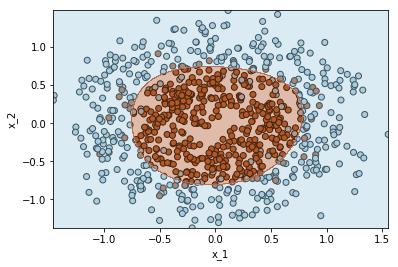

In [7]:
# Trực quan hóa đường phân lớp học được
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap=plt.cm.get_cmap("Paired"), 
            edgecolors="black")
x1_min = train_X[:, 0].min(); x1_max = train_X[:, 0].max()
x2_min = train_X[:, 1].min(); x2_max = train_X[:, 1].max()
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.xlabel("x_1")
plt.ylabel("x_2")

x1x1, x2x2 = np.meshgrid(np.linspace(x1_min, x1_max, 1000), np.linspace(x2_min, x2_max, 1000))
pp = neural_net_model.predict(np.c_[x1x1.reshape(-1), x2x2.reshape(-1)]).reshape(x1x1.shape)
plt.contourf(x1x1, x2x2, pp, cmap=plt.cm.get_cmap("Paired"), alpha=.4);

In [8]:
# Độ lỗi trên tập huấn luyện
np.mean(train_y != neural_net_model.predict(train_X))

0.11749999999999999

In [9]:
# Độ lỗi ngoài tập huấn luyện
np.mean(test_y != neural_net_model.predict(test_X))

0.12

---

In [10]:
# Tạo mô hình Neural Net với: 
# * 1 tầng ẩn gồm 100 nơ-ron, hàm kích hoạt: tanh
# * Thuật toán cực tiểu hóa: LBFGS, số vòng lặp tối đa: 1000
neural_net_model2 = MLPClassifier(hidden_layer_sizes=(100,), activation="tanh",
                                solver="lbfgs", max_iter=1000, random_state=0)

In [11]:
# Fit mô hình vào tập huấn luyện
neural_net_model2.fit(train_X, train_y)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

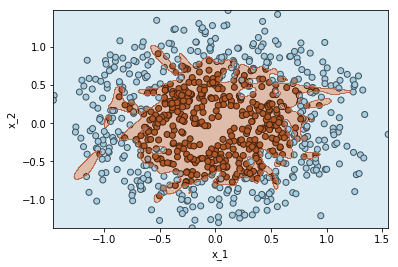

In [12]:
# Trực quan hóa đường phân lớp học được
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap=plt.cm.get_cmap("Paired"), 
            edgecolors="black")
x1_min = train_X[:, 0].min(); x1_max = train_X[:, 0].max()
x2_min = train_X[:, 1].min(); x2_max = train_X[:, 1].max()
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.xlabel("x_1")
plt.ylabel("x_2")

x1x1, x2x2 = np.meshgrid(np.linspace(x1_min, x1_max, 1000), np.linspace(x2_min, x2_max, 1000))
pp = neural_net_model2.predict(np.c_[x1x1.reshape(-1), x2x2.reshape(-1)]).reshape(x1x1.shape)
plt.contourf(x1x1, x2x2, pp, cmap=plt.cm.get_cmap("Paired"), alpha=.4);

In [13]:
# Độ lỗi trên tập huấn luyện
np.mean(train_y != neural_net_model2.predict(train_X))

0.058749999999999997

In [14]:
# Độ lỗi ngoài tập huấn luyện
np.mean(test_y != neural_net_model2.predict(test_X))

0.19

In [ ]:
# return a list of dataFrame
#total size = 3600
#each part size = 720
# => test 720 : train 2880

def devideData():
    # do something
    # đọc dữ liệu
    total_data_train = readData('pos_train_preproc.txt', 'neutr_train_preproc.txt', 'neg_train_preproc.txt', 1200).reset_index()
    list_data = list()
    
    for i in range(0, 5):
        backup = total_data_train
        test_data = pd.concat([total_data_train.iloc[240*i: 240*i + 240], total_data_train.iloc[1200 + 240*i : 1200 + 240*i + 240], 
                total_data_train.iloc[2400 + 240*i : 2400 + 240*i + 240]])
        backup = backup.drop(backup.index[2400 + 240*i : 2400 + 240*i + 240])
        backup = backup.drop(backup.index[1200 + 240*i : 1200 + 240*i + 240])
        backup = backup.drop(backup.index[0:240])
        backup = backup.reset_index(drop=True)
        list_data.append([backup, test_data])
    return list_data
# return a list of scores
def crossValidation(model, listData):
    listScores = []
    # do something
    tfidf_trans = TfidfVectorizer()
    for data in listData:
        #print(data)
        # chuyển đổi dữ liệu
        tfidf_text_cross_train = tfidf_trans.fit_transform(data[0]['text'])
        tfidf_text_cross_test = tfidf_trans.transform(data[1]['text'])
        # train model 
        model.fit(tfidf_text_cross_train, data[0]['label'])
        # tính điểm
        score = np.mean(data[1]['label'] != model.predict(tfidf_text_cross_test))
        listScores.append(score)
    return listScores

pipeline_svm_demo = Pipeline([
    #('bow', CountVectorizer()),
    #('tfidf', TfidfTransformer()),
    ('classifier', SVC())
    ])



In [ ]:
grid_svm_demo = SVC(kernel='linear', C=1)#get_SVM_model(pipeline_svm_demo)
list_data = devideData()
# train model
list_scores = crossValidation(grid_svm_demo, list_data)
print(list_scores)
print(np.mean(list_scores))